<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_food_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [7]:
folder = '/content/drive/MyDrive/Data_CNN/archive/Images/Train'
food = ['Banh mi', 'Banh pia', 'Banh tet', 'Banh xeo', 'Bun bo Hue', 'Bun dau mam tom', 'Bun thit nuong', 'Ca kho to', 'Canh chua', 'Cao lau']
photos, lables = list(), list()
for i in range (10):
  filename = folder +'/'+ food[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos = asarray(photos)
lables = asarray(lables)

KeyboardInterrupt: ignored

In [3]:
print(photos.shape)
print(lables.shape)

NameError: ignored

In [7]:
from keras.utils import to_categorical
y = to_categorical(lables)
print(y.shape)

(6261, 10)


In [2]:
train_X = photos.astype('float32')
train_X = photos / 255

NameError: ignored

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [ ]:
batch_size = 64
epochs = 10
classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (200,200,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

In [ ]:
train = model.fit(train_X, train_Y, batch_size = batch_size, epochs = epochs, verbose = 1)

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 1.6170 - accuracy: 0.1818


[1.6170483827590942, 0.1818181872367859]

(64, 64)
1/1 [==============================] - 0s 54ms/step
banhtrang
pho


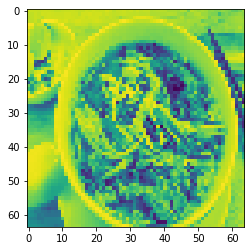

In [ ]:
n=0
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 64, 64)))
print(food[pred.argmax()])
print(food[y_test[n].argmax()])